# 1. Importar Librerías

In [1]:
#Librerías para manipulación de datos
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#Importar módulo de funciones
import sys
sys.path.insert(0, 'utils')  # Añadir el directorio 'utils' al PATH
import funciones
from importlib import reload
reload(funciones)  # Recarga el módulo

pd.set_option('display.max_columns',None)

# 2. Importar datos

In [25]:
data = pd.read_csv('data/seleccion_gb.csv')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4353 entries, 0 to 4352
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   num__Age                               4353 non-null   float64
 1   num__DistanceFromHome                  4353 non-null   float64
 2   num__MonthlyIncome                     4353 non-null   float64
 3   num__NumCompaniesWorked                4353 non-null   float64
 4   num__PercentSalaryHike                 4353 non-null   float64
 5   num__TrainingTimesLastYear             4353 non-null   float64
 6   num__YearsAtCompany                    4353 non-null   float64
 7   cat__EnvironmentSatisfaction_Bajo      4353 non-null   float64
 8   cat__JobSatisfaction_Bajo              4353 non-null   float64
 9   cat__JobSatisfaction_Muy alto          4353 non-null   float64
 10  cat__WorkLifeBalance_Mala              4353 non-null   float64
 11  cat_

In [27]:
X = data.drop('target', axis = 1)
y = data.target

X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Comparación de técnicas

## 3.1. Regresión Logística

In [28]:
log = LogisticRegression(class_weight="balanced", random_state = 42).fit(X_train, y_train)

------------------------------ TRAIN ------------------------------


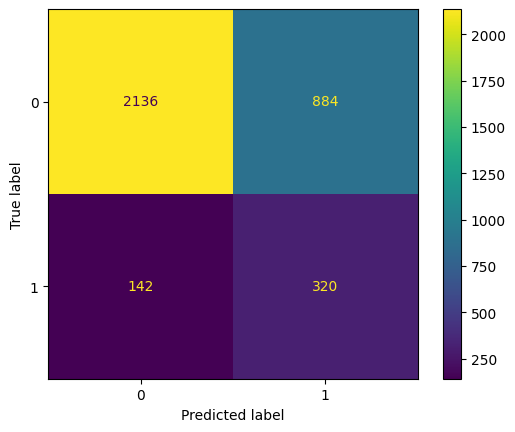

Precision: 0.26578073089701
Recall: 0.6926406926406926
Especificidad: 0.7072847682119205
F1 score: 0.3841536614645858
Train score:  0.7053417576105686
------------------------------ TEST ------------------------------


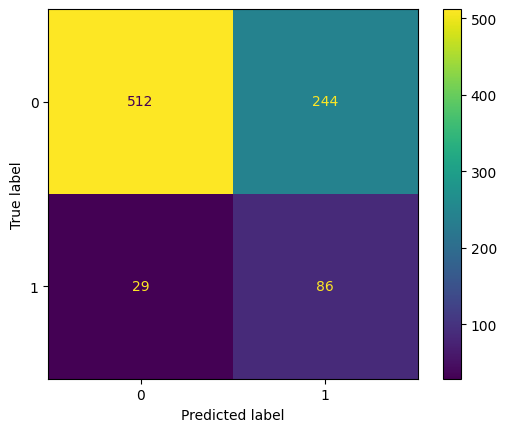

Precision: 0.2606060606060606
Recall: 0.7478260869565218
Especificidad: 0.6772486772486772
F1 score: 0.3865168539325843
Train score:  0.6865671641791045


In [29]:
log_train = funciones.metricas(log, X_train, y_train, 'TRAIN')
log_test = funciones.metricas(log, X_test, y_test, 'TEST')

## 3.2. Árbol de decisión

In [30]:
dt = DecisionTreeClassifier(class_weight="balanced", random_state = 42).fit(X_train, y_train)

------------------------------ TRAIN ------------------------------


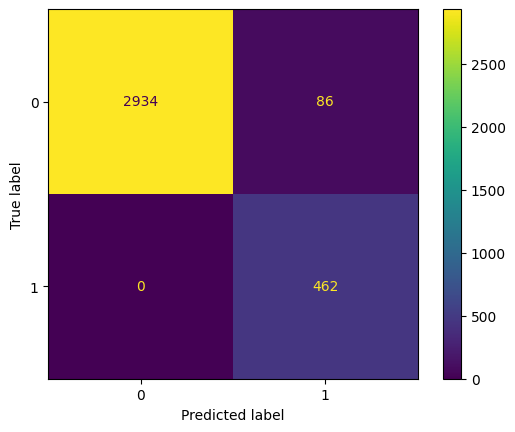

Precision: 0.843065693430657
Recall: 1.0
Especificidad: 0.971523178807947
F1 score: 0.9148514851485148
Train score:  0.9753015508328546
------------------------------ TEST ------------------------------


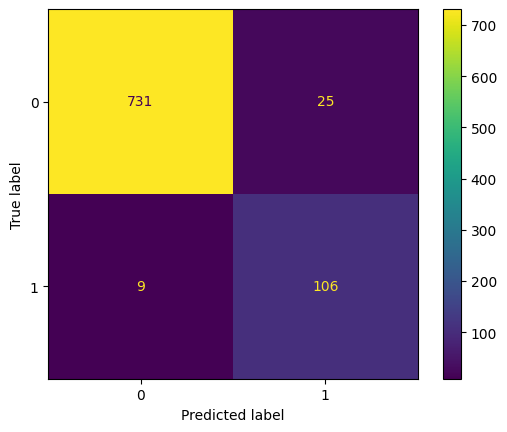

Precision: 0.8091603053435115
Recall: 0.9217391304347826
Especificidad: 0.966931216931217
F1 score: 0.8617886178861789
Train score:  0.9609644087256027


In [31]:
dt_train = funciones.metricas(dt, X_train, y_train, 'TRAIN')
dt_test = funciones.metricas(dt, X_test, y_test, 'TEST')

## 3.3. Bosque Aleatorio

In [32]:
rf = RandomForestClassifier(class_weight="balanced", random_state = 42).fit(X_train, y_train)

------------------------------ TRAIN ------------------------------


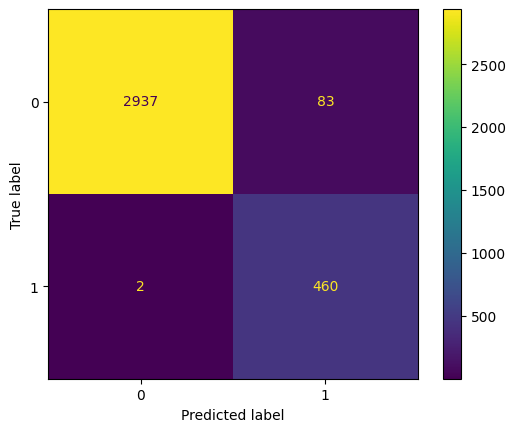

Precision: 0.8471454880294659
Recall: 0.9956709956709957
Especificidad: 0.9725165562913908
F1 score: 0.9154228855721394
Train score:  0.9755887421022401
------------------------------ TEST ------------------------------


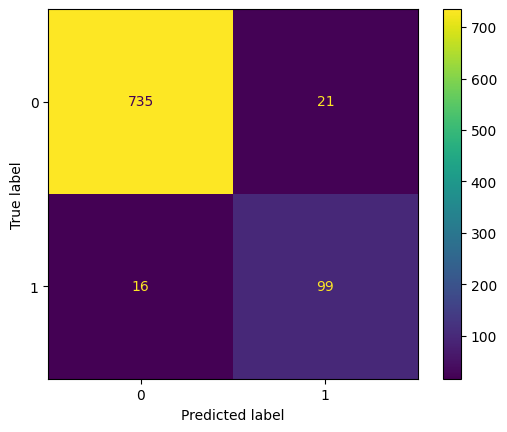

Precision: 0.825
Recall: 0.8608695652173913
Especificidad: 0.9722222222222222
F1 score: 0.8425531914893616
Train score:  0.9575200918484501


In [33]:
rf_train = funciones.metricas(rf, X_train, y_train, 'TRAIN')
rf_test = funciones.metricas(rf, X_test, y_test, 'TEST')

## 3.4. Gradient Boosting Classifier

In [34]:
gb = GradientBoostingClassifier(random_state = 42).fit(X_train, y_train)

------------------------------ TRAIN ------------------------------


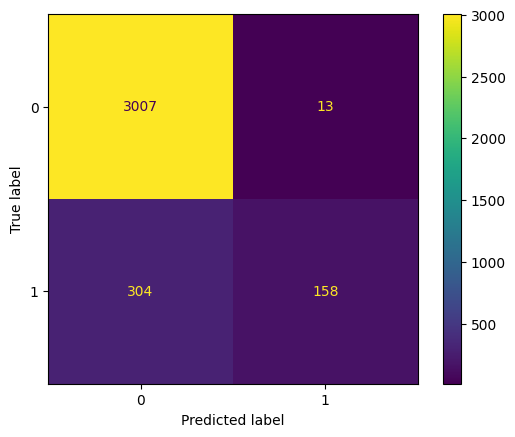

Precision: 0.9239766081871345
Recall: 0.341991341991342
Especificidad: 0.9956953642384105
F1 score: 0.49921011058451825
Train score:  0.9089603676048248
------------------------------ TEST ------------------------------


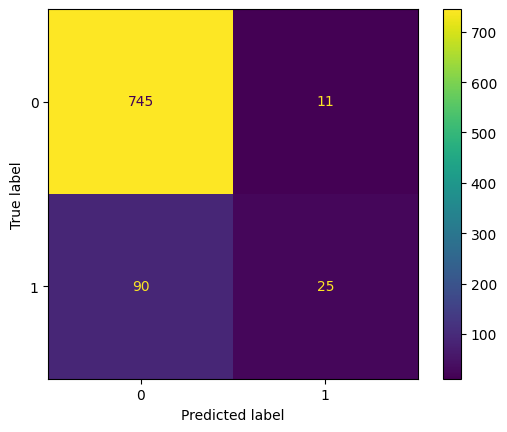

Precision: 0.6944444444444444
Recall: 0.21739130434782608
Especificidad: 0.9854497354497355
F1 score: 0.33112582781456956
Train score:  0.8840413318025259


In [35]:
gb_train = funciones.metricas(gb, X_train, y_train, 'TRAIN')
gb_test = funciones.metricas(gb, X_test, y_test, 'TEST')

# 4. Definir ganador

El modelo con mejor desempeño, tanto en train como en test, fue el árbol de decisión. Además, es un modelo con alta interpretabilidad, lo que va de la mano con nuestro diseño de solución.